In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################    
target_column= 'compressive_strength'
target_column1 = 'slump'

In [3]:
df

,density_fresh,density_at_test,q_cement,q_water,id_cement,cement_label,sand_coarsness,q_crushed_sand,q_non_crushed_sand,q_ash,...,q_stone_3,id_stone,stone_type,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength
5,2362.000906,0.000000,305.0,173.0,16.0,CEM_II_42.5_R/A-L,NaN,0.0,819.0,0.0,...,482.0,34.0,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,0.000000
11,2367.883847,0.000000,270.0,168.6,60.0,CEM_I_42.5_R,NaN,0.0,821.0,0.0,...,475.0,34.0,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000
17,2400.240024,0.000000,270.0,166.3,60.0,CEM_I_42.5_R,NaN,0.0,684.0,0.0,...,445.0,34.0,crushed_stone,16.5,NaN,NaN,NaN,NaN,NaN,0.000000
23,2307.579102,2314.937454,225.0,252.8,60.0,CEM_I_42.5_R,NaN,0.0,819.0,75.0,...,595.0,52.0,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.426049
24,2326.703259,2329.938876,225.0,252.8,60.0,CEM_I_42.5_R,NaN,0.0,819.0,75.0,...,595.0,52.0,crushed_stone,15.5,NaN,NaN,NaN,NaN,NaN,15.800109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7485,0.000000,2219.249350,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,445.0,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,15.748495
7486,0.000000,2219.227506,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,445.0,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,12.240642
7487,0.000000,2284.606742,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,445.0,NaN,crushed_stone,12.0,0.0,0.0,0.0,0.0,0.01,8.295060
7489,0.000000,2248.794867,260.0,170.0,46.0,CEM_II_42.5_R/B-M,NaN,660.0,195.0,0.0,...,445.0,NaN,crushed_stone,16.0,0.0,0.0,0.0,0.0,0.01,21.916017


best_params are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_non_crushed_sand', 'CEM_id_CEM_III', 'q_waterproofing', 'CEM_id_CEM_IV', 'q_retardant']


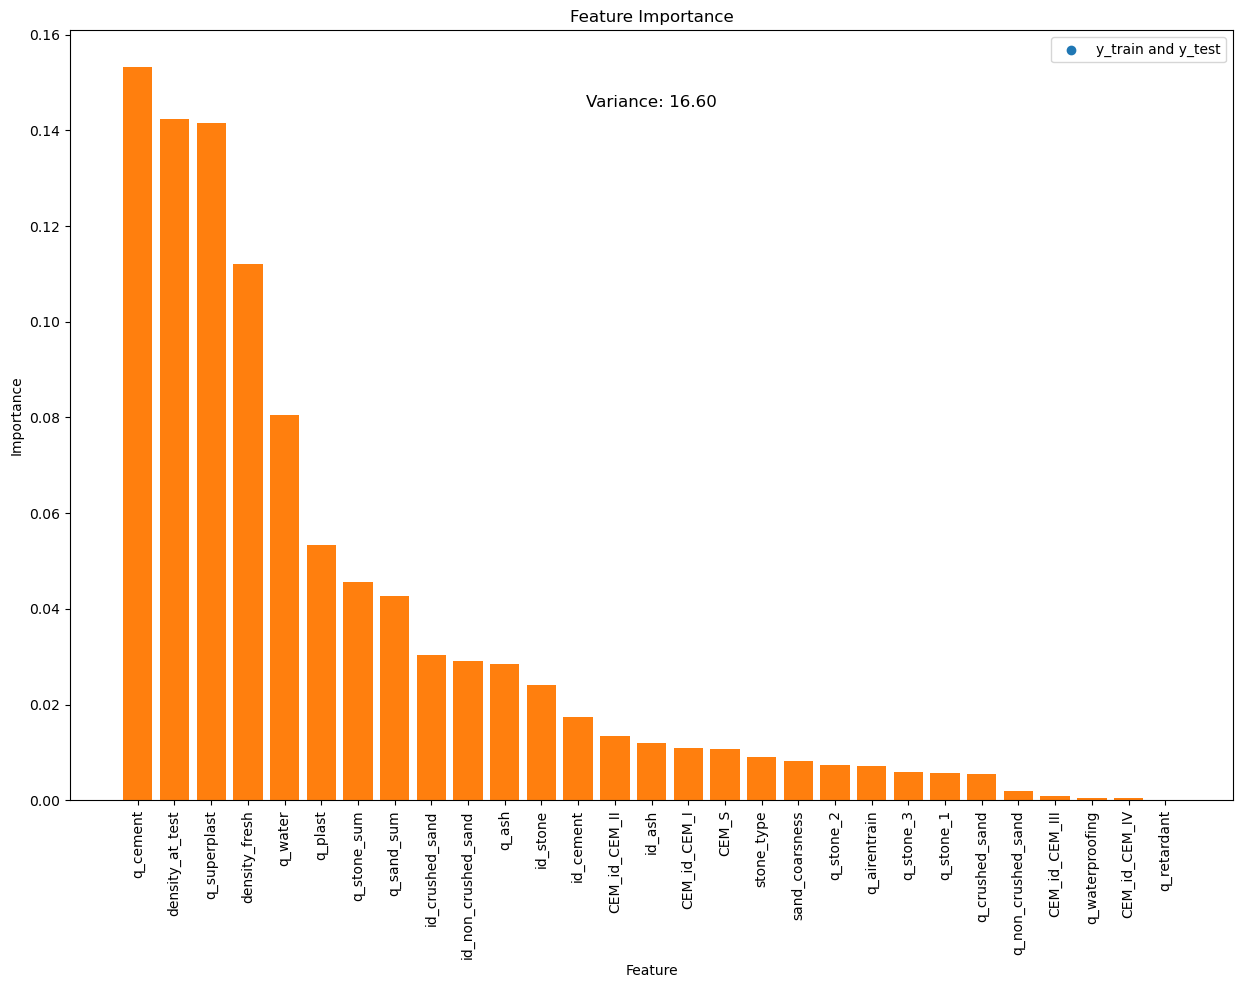

In [4]:
from data_analysis import data_processing

The following code reads the data and performs preprocessing using our 'data_processing' file. 
When the 'Variance' in the bottom image is greater than 20, 
it's often advisable to rerun the 'data_processing' function. 
This is because the columns with somehow important regression relationships might have been removed.

best_params are: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
useless_feature: ['q_airentrain', 'q_non_crushed_sand', 'CEM_id_CEM_III', 'CEM_id_CEM_IV', 'q_waterproofing', 'q_retardant']


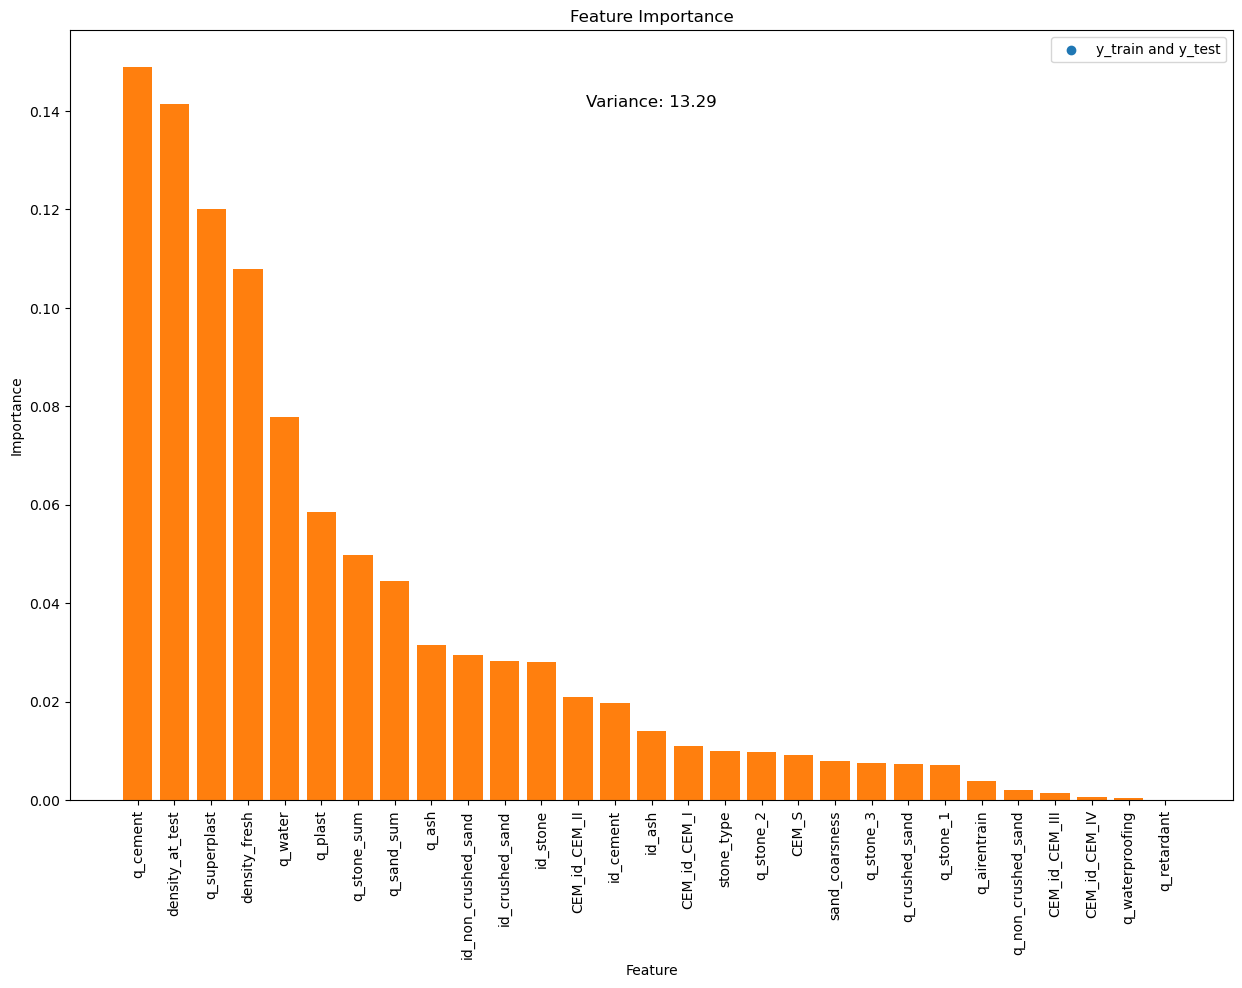

In [5]:
df = data_processing(df, target_column, target_column1)

In [6]:
df

,density_fresh,density_at_test,q_cement,q_water,id_cement,sand_coarsness,q_crushed_sand,q_ash,id_crushed_sand,id_non_crushed_sand,...,stone_type,slump,q_superplast,q_plast,compressive_strength,q_stone_sum,q_sand_sum,CEM_S,CEM_id_CEM_I,CEM_id_CEM_II
23,2307.579102,2314.937454,225.0,252.80,60.0,0.0,0,75.00,0.0,65.0,...,1.0,15.5,0.000000,0.000000,15.426049,1079.00,819.0,42.5,1,0
24,2326.703259,2329.938876,225.0,252.80,60.0,0.0,0,75.00,0.0,65.0,...,1.0,15.5,0.000000,0.000000,15.800109,1079.00,819.0,42.5,1,0
30,2275.555556,2275.259259,225.0,212.00,60.0,0.0,0,75.00,0.0,65.0,...,1.0,17.5,0.000000,0.010000,23.528889,1079.00,819.0,42.5,1,0
31,2275.698158,2278.669043,225.0,212.00,60.0,0.0,0,75.00,0.0,65.0,...,1.0,17.5,0.000000,0.010000,24.545455,1079.00,819.0,42.5,1,0
37,2281.481481,2285.333333,300.0,220.00,60.0,0.0,0,0.00,0.0,65.0,...,1.0,17.0,0.000000,0.010000,27.840000,1079.00,819.0,42.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,2367.407407,2322.962963,265.3,99.60,16.0,0.0,1,70.20,3.0,19.0,...,1.0,0.0,0.009765,0.009765,55.720000,949.90,906.1,52.5,1,0
7466,2306.666667,2231.111111,218.5,97.25,16.0,5.0,1,78.75,3.0,19.0,...,1.0,0.0,0.008562,0.008562,32.093333,909.25,1058.0,52.5,1,0
7467,2322.962963,2240.000000,218.5,97.25,16.0,5.0,1,78.75,3.0,19.0,...,1.0,0.0,0.008562,0.008562,33.111111,909.25,1058.0,52.5,1,0
7468,2322.147651,2246.085011,218.5,97.25,16.0,0.0,1,78.75,3.0,19.0,...,1.0,0.0,0.008562,0.008562,32.308725,909.25,1058.0,52.5,1,0


In [7]:
X = df.drop('compressive_strength',axis=1)
y = df['compressive_strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.133e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.119e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+04, to

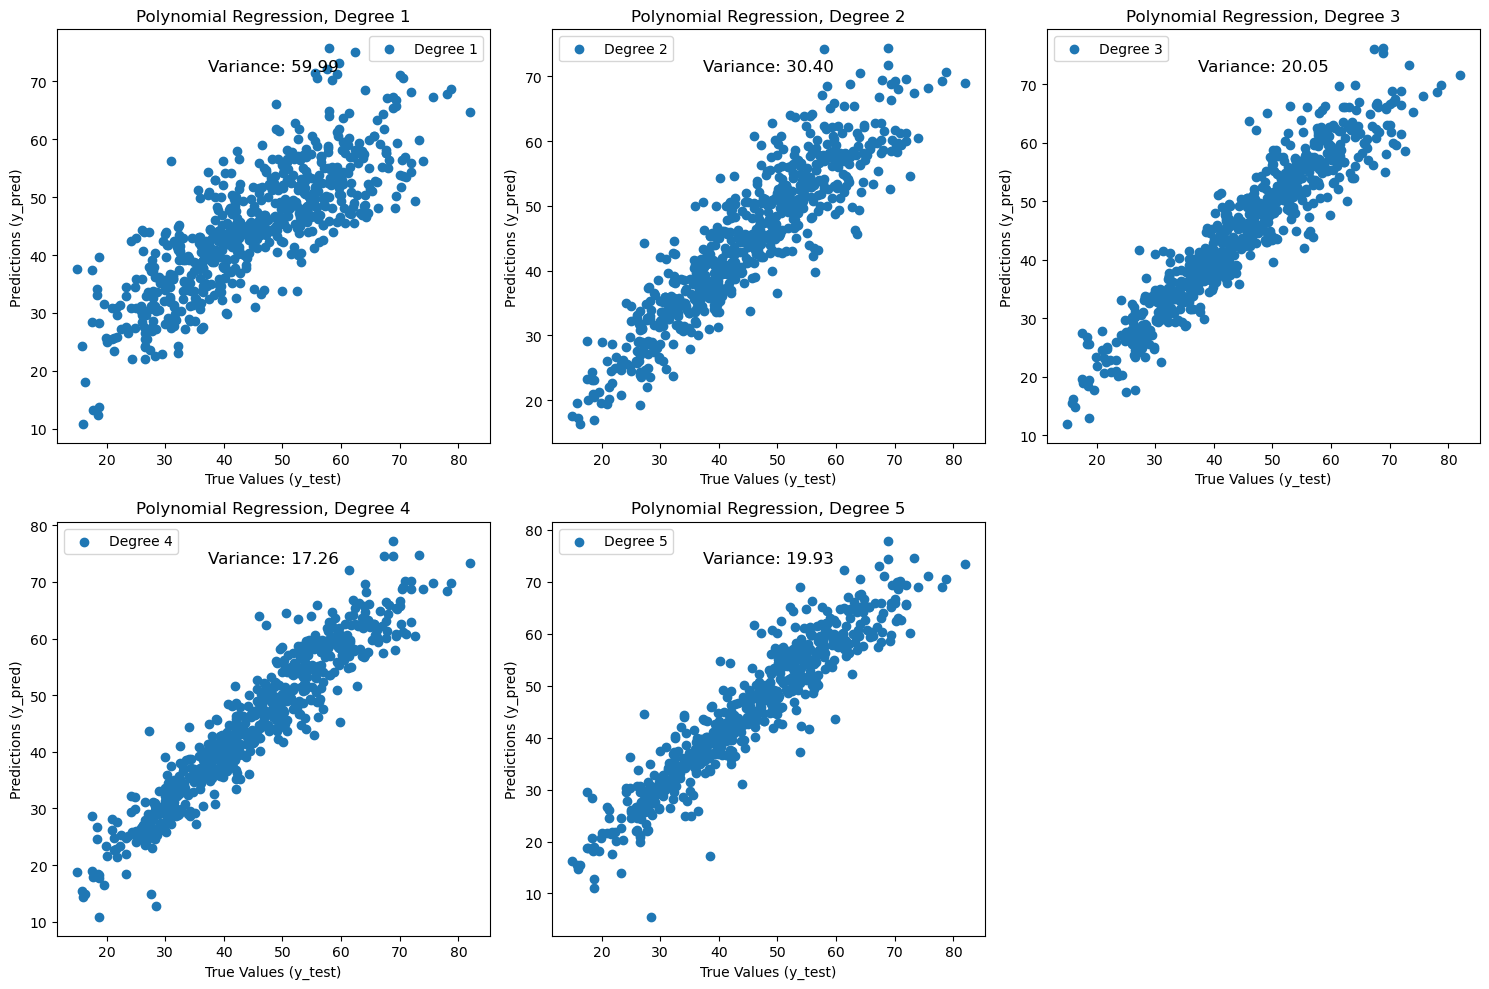

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 10))


for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Create PolynomialFeatures transformer to generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)
    X_poly_test = poly_transformer.transform(X_test)

    # Create and fit the linear regression model
    lin_reg = Lasso(alpha=0.5)
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions using the fitted model
    y_pred = lin_reg.predict(X_poly_test)
    variance = np.var(y_test - y_pred)
    # Plot the predictions
    plt.scatter(y_test, y_pred, label=f'Degree {degree}')
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predictions (y_pred)')
    plt.title(f'Polynomial Regression, Degree {degree}')
    plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
    plt.legend()

plt.tight_layout()
plt.show()

C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e+04, tolerance: 4.578e+01
  model = cd_fast.enet_coordinate_descent(


Best Hyperparameters: {'alpha': 0.0005, 'fit_intercept': True}
Mean Squared Error: 19.36


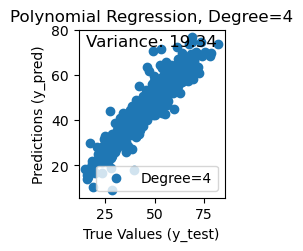

In [9]:
param_grid = {
    'alpha': [0.01, 0.1, 0.0005,],
    'fit_intercept': [True, False]
}

plt.subplot(2, 3, i+1)
poly_transformer = PolynomialFeatures(degree=4)
X_poly_train = poly_transformer.fit_transform(X_train)
X_poly_test = poly_transformer.transform(X_test)

lin_reg = Lasso()

grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_poly_train, y_train)

best_params = grid_search.best_params_
best_alpha = best_params['alpha']
best_fit_intercept = best_params['fit_intercept']

lin_reg = Lasso(alpha=best_alpha, fit_intercept=best_fit_intercept)
lin_reg.fit(X_poly_train, y_train)

y_pred = lin_reg.predict(X_poly_test)
variance = np.var(y_test - y_pred)

# Plot the predictions
plt.scatter(y_test, y_pred, label=f'Degree=4')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title(f'Polynomial Regression, Degree=4')
plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
plt.legend()
# mse

mse = mean_squared_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse:.2f}")

In [10]:
################################################################################################################################

In [11]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]
columns_to_drop = ['probe_index', 'name', 'weight_fresh', 'weight_at_test', 'size_x', 'size_y', 'size_z', 'age','slump.1']
df = df.drop(columns=columns_to_drop)
###############################################################################################    
target_column= 'slump'
target_column1 = 'compressive_strength'

best_params are: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
useless_feature: ['CEM_S', 'q_stone_1', 'q_non_crushed_sand', 'CEM_id_CEM_II', 'q_stone_2', 'CEM_id_CEM_I', 'q_airentrain', 'q_waterproofing', 'CEM_id_CEM_IV', 'CEM_id_CEM_III', 'q_retardant']


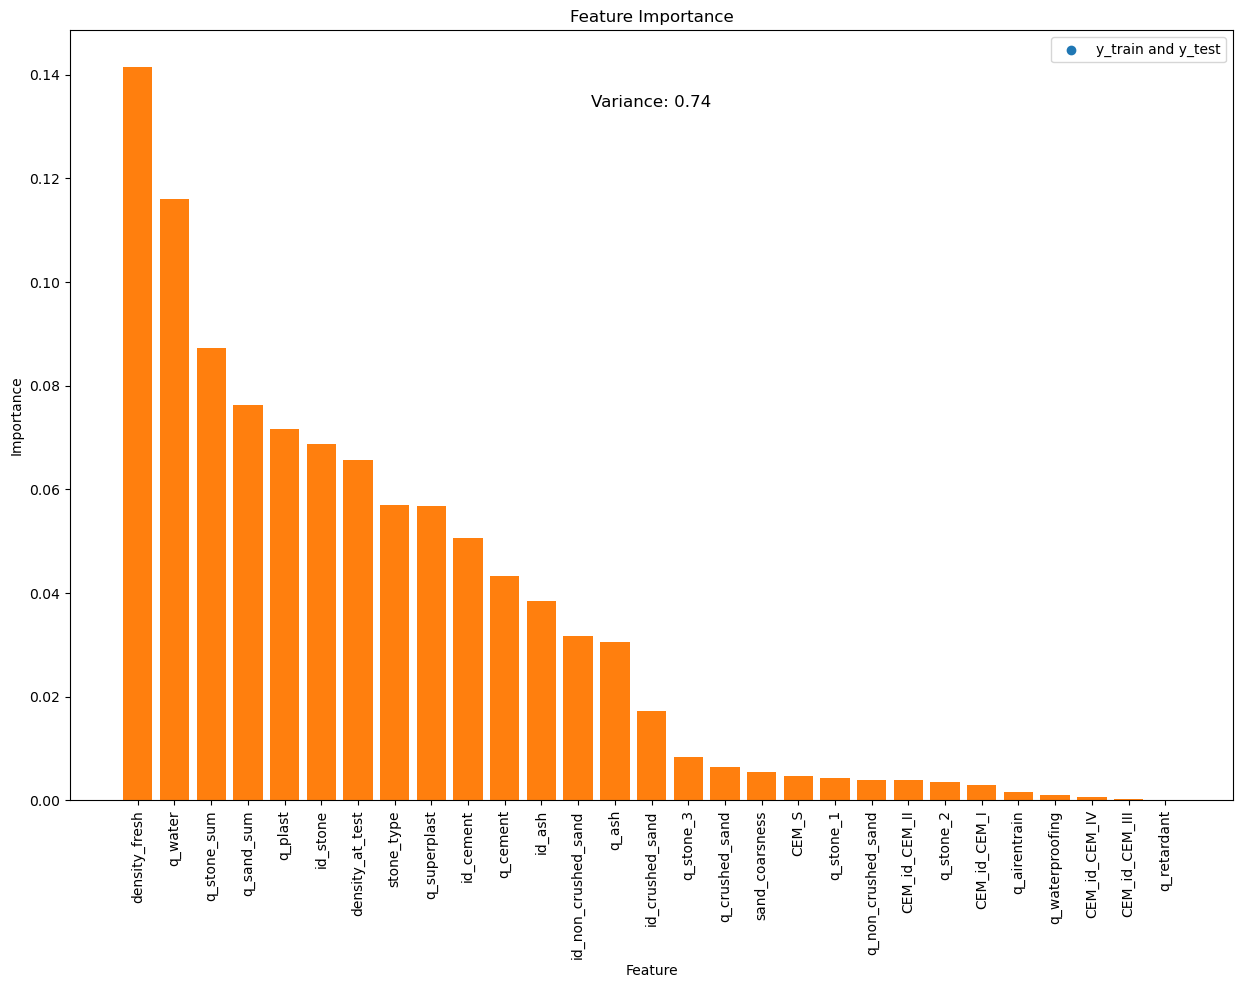

In [12]:
df = data_processing(df, target_column, target_column1)

In [13]:
X = df.drop('slump',axis=1)
y = df['slump']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.556e+03, tolerance: 5.455e+00
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+03, tolerance: 5.455e+00
  model = cd_fast.enet_coordinate_descent(
C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.433e+03, to

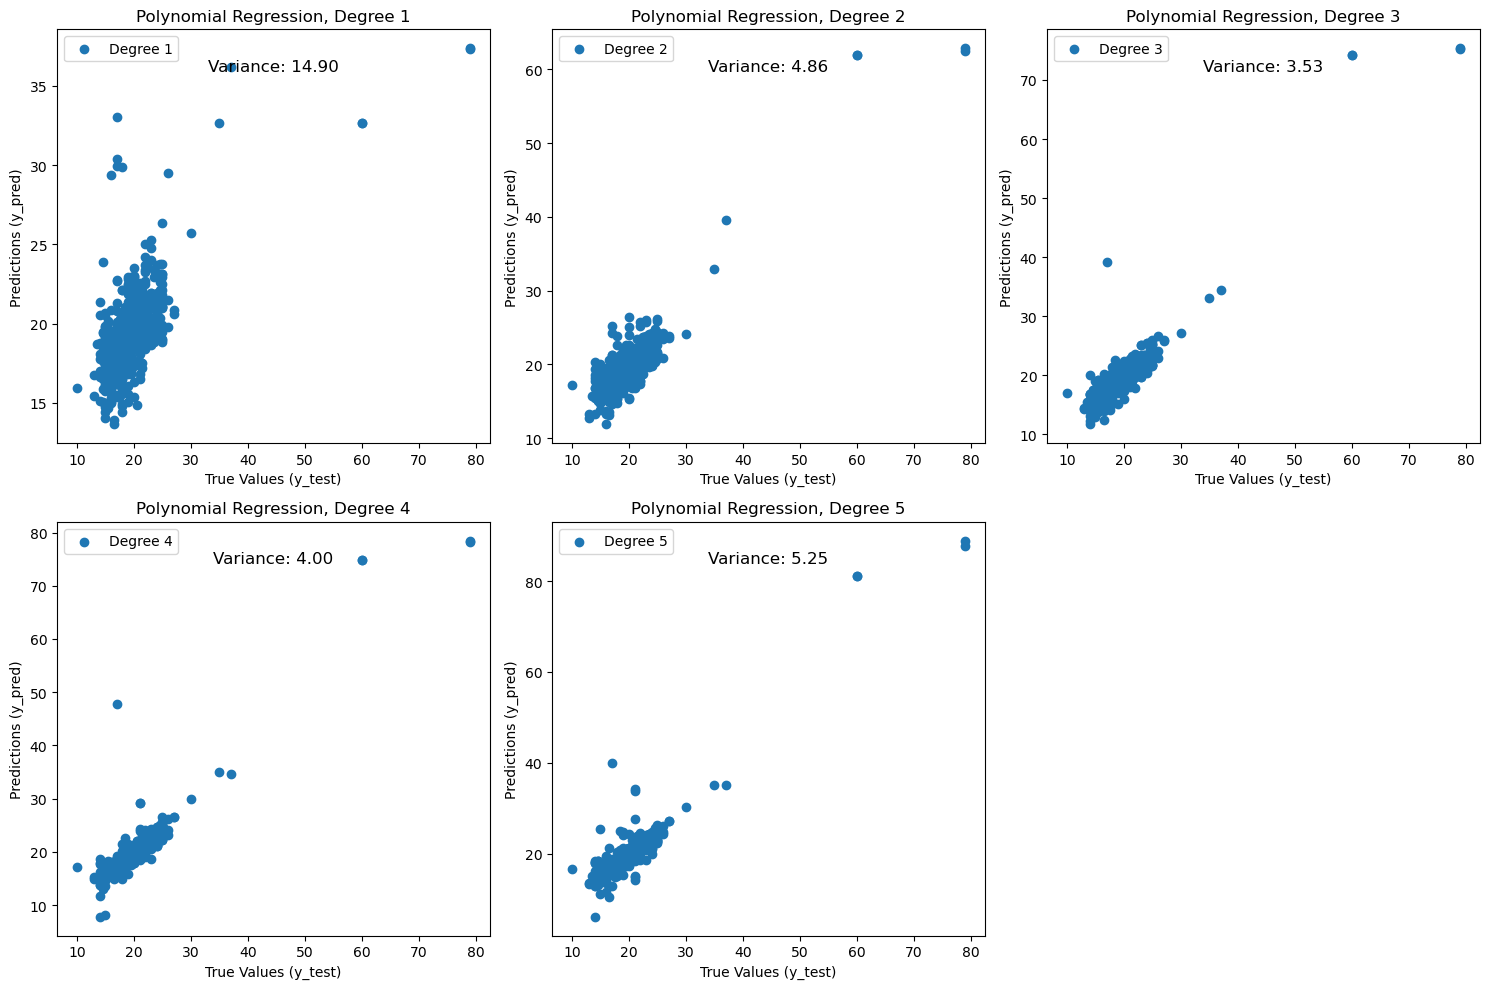

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(15, 10))


for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Create PolynomialFeatures transformer to generate polynomial features
    poly_transformer = PolynomialFeatures(degree=degree)
    X_poly_train = poly_transformer.fit_transform(X_train)
    X_poly_test = poly_transformer.transform(X_test)

    # Create and fit the linear regression model
    lin_reg = Lasso(alpha=0.5)
    lin_reg.fit(X_poly_train, y_train)

    # Make predictions using the fitted model
    y_pred = lin_reg.predict(X_poly_test)
    variance = np.var(y_test - y_pred)
    # Plot the predictions
    plt.scatter(y_test, y_pred, label=f'Degree {degree}')
    plt.xlabel('True Values (y_test)')
    plt.ylabel('Predictions (y_pred)')
    plt.title(f'Polynomial Regression, Degree {degree}')
    plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
    plt.legend()

plt.tight_layout()
plt.show()

C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+03, tolerance: 1.012e+02
  model = cd_fast.enet_coordinate_descent(


Best Hyperparameters: {'alpha': 0.0005, 'fit_intercept': False}
Mean Squared Error: 3.37


C:\anaconda3\envs\learning\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.369e+03, tolerance: 1.012e+02
  model = cd_fast.enet_coordinate_descent(


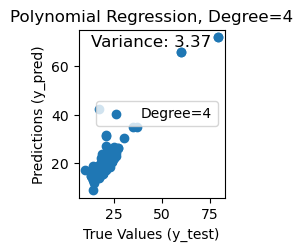

In [15]:
param_grid = {
    'alpha': [0.01, 0.1, 0.0005,],
    'fit_intercept': [True, False]
}

plt.subplot(2, 3, i+1)
poly_transformer = PolynomialFeatures(degree=4)
X_poly_train = poly_transformer.fit_transform(X_train)
X_poly_test = poly_transformer.transform(X_test)

lin_reg = Lasso()

grid_search = GridSearchCV(estimator=lin_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_poly_train, y_train)

best_params = grid_search.best_params_
best_alpha = best_params['alpha']
best_fit_intercept = best_params['fit_intercept']

lin_reg = Lasso(alpha=best_alpha, fit_intercept=best_fit_intercept)
lin_reg.fit(X_poly_train, y_train)

y_pred = lin_reg.predict(X_poly_test)
variance = np.var(y_test - y_pred)

# Plot the predictions
plt.scatter(y_test, y_pred, label=f'Degree=4')
plt.xlabel('True Values (y_test)')
plt.ylabel('Predictions (y_pred)')
plt.title(f'Polynomial Regression, Degree=4')
plt.text(0.5, 0.9, f'Variance: {variance:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='center')
plt.legend()
# mse

mse = mean_squared_error(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse:.2f}")